### Librairies Installation

In [1]:
!pip install git+https://github.com/openai/whisper.git
!pip install transformers datasets accelerate
!pip install reportlab  # pour PDF
!pip install python-docx # pour DOCX si besoin
!pip install pyannote.audio torch librosa
!pip install pydub
!pip install fpdf

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-hpa77cge
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-hpa77cge
  Resolved https://github.com/openai/whisper.git to commit c0d2f624c09dc18e709e37c2ad90c039a4eb72a2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai-whisper: filename=openai_whisper-20250625-py3-none-any.whl size=803979 sha256=e452fee2ad8d4b3b98fa312d265c2fd7d29c3fb024c19bb9cc335956ff041d85
  Stored in directory: /tmp/pip-ephem-wheel-cache-z53e5uyt/wheels/c3/03/25/5e0ba78bc27a3a089f137c9f1d92fdfce16d06996c071a016c
Successfully built openai-whisper
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install gTTS pydub


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.2.1
    Uninstalling click-8.2.1:
      Successfully uninstalled click-8.2.1


## Audio preparation for Testing

In [ ]:

from gtts import gTTS
from pydub import AudioSegment

# ---------------- Texts for speakers ----------------
text_alice = "Hi Bob, thanks for joining. Let’s review the progress on the Data Analytics Dashboard project."
text_alice1 = "Great. Let’s start. Our goal is to finalize the dashboard with real-time metrics and user-friendly visualizations by the end of this month."
text_alice2 = "Excellent. How about the remaining tasks?"
text_alice3 = "Okay, let’s prioritize integrating the marketing data first, then optimize the charts. We should also prepare a draft dashboard for internal review by next week."
text_alice4= "Perfect. Let’s also schedule a short follow-up meeting mid-week to check progress and address any blockers."
text_alice5="Thanks, Bob. That covers everything for today."


text_bob = "Hi Alice, sure. I’ve prepared a quick summary of what’s been done so far."
text_bob1 = "Yes. Regarding advancement, we’ve completed the data pipeline setup and integrated the first three data sources. The charts for sales and customer engagement are working as expected."
text_bob2= "We still need to integrate the marketing data and implement role-based access controls. Also, some charts require performance optimization to handle large datasets."
text_bob3="Agreed. I can handle the data integration, and we can collaborate on the optimization together."
text_bob4="Sounds good. I’ll update the task list and share it with you by tomorrow."
text_bob5= "Thank you, Alice. Talk to you mid-week."


# ---------------- Function to generate AudioSegment from text ----------------
def tts_to_audio(text, lang='en', tld='com', pitch_adjust=1.0):
    tts = gTTS(text, lang=lang, tld=tld)
    temp_file = "temp.mp3"
    tts.save(temp_file)
    audio = AudioSegment.from_file(temp_file)
    if pitch_adjust != 1.0:
        audio = audio._spawn(audio.raw_data, overrides={"frame_rate": int(audio.frame_rate * pitch_adjust)}).set_frame_rate(44100)
    return audio

# ---------------- Generate AudioSegments ----------------
audio_alice = tts_to_audio(text_alice)
audio_alice1 = tts_to_audio(text_alice1)
audio_alice2 = tts_to_audio(text_alice2)
audio_alice3 = tts_to_audio(text_alice3)
audio_alice4 = tts_to_audio(text_alice4)
audio_alice5 = tts_to_audio(text_alice5)

audio_bob = tts_to_audio(text_bob, tld='co.uk', pitch_adjust=0.85)
audio_bob1 = tts_to_audio(text_bob1, tld='co.uk', pitch_adjust=0.85)
audio_bob2 = tts_to_audio(text_bob2, tld='co.uk', pitch_adjust=0.85)
audio_bob3 = tts_to_audio(text_bob3, tld='co.uk', pitch_adjust=0.85)
audio_bob4 = tts_to_audio(text_bob4, tld='co.uk', pitch_adjust=0.85)
audio_bob5 = tts_to_audio(text_bob5, tld='co.uk', pitch_adjust=0.85)


# ---------------- Add short silence between segments ----------------
pause = AudioSegment.silent(duration=700)  # 0.7 sec

# ---------------- Concatenate all segments ----------------
meeting_audio = (
    audio_alice + pause + audio_bob + pause + audio_alice1 + pause +
    audio_bob1 + pause + audio_alice2 + pause + audio_bob2 + pause + audio_alice3 + pause + audio_bob3 + pause + audio_alice4
    + pause + audio_bob4 + pause + audio_alice5 + pause + audio_bob5
)

# ---------------- Export to WAV ----------------
meeting_audio.export("meeting1.wav", format="wav")

print("✅ Audio file created with 3 speakers: meeting1.wav")


/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


✅ Audio file created with 3 speakers: meeting1.wav


## Meeting Transcription & Speaker Diarization

**Necessary Librairies**

In [3]:
import whisper
from google.colab import files
from pyannote.audio import Pipeline
from pydub import AudioSegment
from transformers import pipeline
import torch
from fpdf import FPDF


/usr/local/lib/python3.12/dist-packages/pyannote/audio/core/io.py:212: UserWarning: torchaudio._backend.list_audio_backends has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  torchaudio.list_audio_backends()
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\

In [ ]:
# Check device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(" Using device:", device)

# Load Whisper model
model = whisper.load_model("base", device=device)

#  Audio file
file_name = "/content/drive/MyDrive/report-generator/meeting1(3).wav"

# Detect language & Transcription
result = model.transcribe(file_name)
transcription = result["text"]
detected_language = result["language"]

print("Detected Language :", detected_language)

print("First 500 characters of transcription:\n", transcription[:500])

# Speaker Diarization with Pyannote
HUGGINGFACE_TOKEN = "add token"  # Hugging Face token


# Load diarization pipeline
pipeline = Pipeline.from_pretrained(
    "pyannote/speaker-diarization",
    use_auth_token=HUGGINGFACE_TOKEN
)

# Apply diarization
diarization = pipeline(file_name)

# Print detected segments
segments = []
for turn, _, speaker in diarization.itertracks(yield_label=True):
    segments.append({
        "start": turn.start,
        "end": turn.end,
        "speaker": speaker
    })

print("\n🔹 Segments détectés:")
for seg in segments[:5]:
    print(f"{seg['start']:.1f}s - {seg['end']:.1f}s : {seg['speaker']}")



 Using device: cpu


100%|███████████████████████████████████████| 139M/139M [00:04<00:00, 33.6MiB/s]
/usr/local/lib/python3.12/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Detected Language : en
First 500 characters of transcription:
  Hello everyone. Thank you for joining this meeting. Today, we will plan the development of the Report Generator project. Thank you. Alice, I will note down the decisions and actions we need to take. First, we should test the whisper model on short audio files to validate transcription quality. I will create a task table with responsibilities assigned for each action. I suggest we also define the output formats, PDF and markdown, so the final report is readable and structured for all users. Yes,


config.yaml:   0%|          | 0.00/500 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/speechbrain/utils/torch_audio_backend.py:57: UserWarning: torchaudio._backend.list_audio_backends has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  available_backends = torchaudio.list_audio_backends()
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _speechbrain_save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _speechbrain_load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoi

pytorch_model.bin:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

config.yaml:   0%|          | 0.00/318 [00:00<?, ?B/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.5.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/torch/pyannote/models--pyannote--segmentation/snapshots/c4c8ceafcbb3a7a280c2d357aee9fbc9b0be7f9b/pytorch_model.bin`
/usr/local/lib/python3.12/dist-packages/pyannote/audio/core/io.py:212: UserWarning: torchaudio._backend.list_audio_backends has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  torchaudio.list_audio_backends()
INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecap

Model was trained with pyannote.audio 0.0.1, yours is 3.3.2. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.8.0+cu126. Bad things might happen unless you revert torch to 1.x.


hyperparams.yaml: 0.00B [00:00, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--spkrec-ecapa-voxceleb/snapshots/0f99f2d0ebe89ac095bcc5903c4dd8f72b367286/hyperparams.yaml' -> '/root/.cache/torch/pyannote/speechbrain/hyperparams.yaml'
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _load
DEBUG:speechbrain.utils.checkpoints:Registered parameter transfer hook for _load
/usr/local/lib/python3.12/dist-packages/speechbrain/utils/autocast.py:188: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook f

embedding_model.ckpt:   0%|          | 0.00/83.3M [00:00<?, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--spkrec-ecapa-voxceleb/snapshots/0f99f2d0ebe89ac095bcc5903c4dd8f72b367286/embedding_model.ckpt' -> '/root/.cache/torch/pyannote/speechbrain/embedding_model.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["embedding_model"] = /root/.cache/torch/pyannote/speechbrain/embedding_model.ckpt
INFO:speechbrain.utils.fetching:Fetch mean_var_norm_emb.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached


mean_var_norm_emb.ckpt:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--spkrec-ecapa-voxceleb/snapshots/0f99f2d0ebe89ac095bcc5903c4dd8f72b367286/mean_var_norm_emb.ckpt' -> '/root/.cache/torch/pyannote/speechbrain/mean_var_norm_emb.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["mean_var_norm_emb"] = /root/.cache/torch/pyannote/speechbrain/mean_var_norm_emb.ckpt
INFO:speechbrain.utils.fetching:Fetch classifier.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached


classifier.ckpt:   0%|          | 0.00/5.53M [00:00<?, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--spkrec-ecapa-voxceleb/snapshots/0f99f2d0ebe89ac095bcc5903c4dd8f72b367286/classifier.ckpt' -> '/root/.cache/torch/pyannote/speechbrain/classifier.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["classifier"] = /root/.cache/torch/pyannote/speechbrain/classifier.ckpt
INFO:speechbrain.utils.fetching:Fetch label_encoder.txt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached


label_encoder.txt: 0.00B [00:00, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--spkrec-ecapa-voxceleb/snapshots/0f99f2d0ebe89ac095bcc5903c4dd8f72b367286/label_encoder.txt' -> '/root/.cache/torch/pyannote/speechbrain/label_encoder.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["label_encoder"] = /root/.cache/torch/pyannote/speechbrain/label_encoder.ckpt
INFO:speechbrain.utils.parameter_transfer:Loading pretrained files for: embedding_model, mean_var_norm_emb, classifier, label_encoder
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): embedding_model -> /root/.cache/torch/pyannote/speechbrain/embedding_model.ckpt
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): mean_var_norm_emb -> /root/.cache/torch/pyannote/speechbrain/mean_var_norm_emb.ckpt
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): classifier -> /root/.cac


🔹 Segments détectés:
0.0s - 8.2s : SPEAKER_00
9.5s - 30.9s : SPEAKER_01
31.6s - 41.3s : SPEAKER_00
42.4s - 46.7s : SPEAKER_00
47.9s - 48.0s : SPEAKER_00


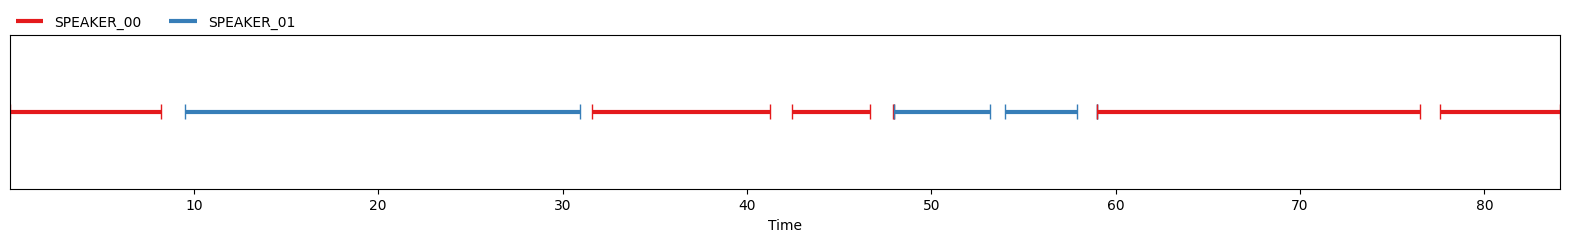

In [12]:
diarization

In [5]:
# Associate Transcription with Speakers
# speaker labels + timestamps
def segments_overlap(s1, e1, s2, e2):

    return max(s1, s2) < min(e1, e2)


structured_transcript = []
for seg in result["segments"]:
    start, end, text = seg["start"], seg["end"], seg["text"]
    speaker = None
    for d in segments:
        if segments_overlap(start, end, d["start"], d["end"]):
            speaker = d["speaker"]
            break
    if speaker is None:
        speaker = "Speaker_Unknown"
    structured_transcript.append(f"{speaker}: {text}")


# Displaying Structured Transcript
print("\n🔹 Transcription structurée avec locuteurs:\n")
for line in structured_transcript[:10]:
    print(line)


🔹 Transcription structurée avec locuteurs:

SPEAKER_00:  Hello everyone. Thank you for joining this meeting.
SPEAKER_00:  Today, we will plan the development of the Report Generator project.
SPEAKER_01:  Thank you. Alice, I will note down the decisions and actions we need to take.
SPEAKER_01:  First, we should test the whisper model on short audio files to validate transcription quality.
SPEAKER_01:  I will create a task table with responsibilities assigned for each action.
SPEAKER_00:  I suggest we also define the output formats, PDF and markdown,
SPEAKER_00:  so the final report is readable and structured for all users.
SPEAKER_00:  Yes, it's important to prioritize the essential features first.
SPEAKER_00:  Agreed. After testing the model and organizing the tasks,
SPEAKER_01:  we can prepare a report draft for the next meeting.


In [ ]:
#Clear memory after transcription / diarization
import gc

# After Whisper transcription
del result
gc.collect()
torch.cuda.empty_cache()  # if using GPU

# After diarization
del pipeline, diarization
gc.collect()
torch.cuda.empty_cache()  # if using GPU

## Meeting Summarization

In [6]:
from transformers import pipeline

# Use a meeting-focused model from Hugging Face
device_summarizer = 0 if torch.cuda.is_available() else -1
summarizer = pipeline(
    "summarization",
    model="knkarthick/MEETING_SUMMARY",
    device=device_summarizer
)

full_text = " ".join(structured_transcript)

summary = summarizer(full_text, max_length=300, min_length=100, do_sample=False)

print("\n🔹 Final Summary:\n")
print(summary[0]['summary_text'])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/337 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu



🔹 Final Summary:

At the meeting SPEAKER_00 and Alice discuss the development of the Report Generator project. They agree to test the whisper model on short audio files to validate transcription quality and to prepare a report draft for the next meeting. They also agree to investigate ways to improve speaker diurization and optimize the summarization pipeline. They schedule a meeting to review their progress and adjust the plan as needed at the next one, which will take place in a month's time.  


In [24]:
import re

summary_text = summary[0]['summary_text']

summary_dict = {
    "Objectives": [],
    "Tasks": []
}

# --- Objectives ---
objectives = re.findall(r"(development of .*?project|improve .*?pipeline|optimize .*?pipeline|goal .*?|objective .*?|purpose .*?|aim .*?|target .*?|mission .*?)", summary_text, re.IGNORECASE)
for obj in objectives:
    summary_dict["Objectives"].append(f"{obj.strip().capitalize()}")


# --- Tasks ---
tasks = re.findall(r"(test .*?|prepare .*?|investigate .*?|analyze .*?|define .*?|create .*?|assign .*?|review .*?|discuss .*?)\.", summary_text, re.IGNORECASE)
for task in tasks:
    summary_dict["Tasks"].append(f"{task.strip().capitalize()}")

# Pretty print results
print("\n🔹 Structured Sections:\n")
for section, items in summary_dict.items():
    print(section + ":")
    if items:
        for item in items:
            print(" -", item)
    else:
        print(" - None")



🔹 Structured Sections:

Objectives:
 - Development of the report generator project
 - Improve speaker diurization and optimize the summarization pipeline
Tasks:
 - Discuss the development of the report generator project
 - Test the whisper model on short audio files to validate transcription quality and to prepare a report draft for the next meeting
 - Investigate ways to improve speaker diurization and optimize the summarization pipeline
 - Review their progress and adjust the plan as needed at the next one, which will take place in a month's time


## Export as PDF

In [11]:
# Create PDF
pdf = FPDF()
pdf.add_page()
pdf.set_auto_page_break(auto=True, margin=15)

# Title
pdf.set_font("Arial", "B", 16)
pdf.cell(0, 10, "Meeting Report", ln=True, align="C")

# Add structured transcript
pdf.set_font("Arial", "", 12)
pdf.ln(10)
pdf.cell(0, 10, " Transcription with Speakers :", ln=True)
pdf.ln(5)

for line in structured_transcript:
    pdf.multi_cell(0, 8, line)

# Add summary
pdf.ln(10)
pdf.set_font("Arial", "B", 14)
pdf.cell(0, 10, "Summary of the meeting :", ln=True)
pdf.set_font("Arial", "", 12)
pdf.ln(5)
pdf.multi_cell(0, 8, summary[0]['summary_text'])

# Add structured sections
pdf.ln(10)
pdf.set_font("Arial", "B", 14)
pdf.cell(0, 10, "Structured Sections:", ln=True)

for key, value in summary_dict.items():
    pdf.set_font("Arial", "B", 12)
    pdf.cell(0, 8, f"{key}:", ln=True)
    pdf.set_font("Arial", "", 12)

    if value:  # join list into string
        for item in value:
            pdf.multi_cell(0, 8, f"- {item}")
    else:
        pdf.multi_cell(0, 8, "Not mentioned")

    pdf.ln(3)


# Save pdf
pdf_file = "meeting_report.pdf"
pdf.output(pdf_file)

print(f"PDF generated: {pdf_file}")


PDF generated: meeting_report.pdf


----------

In [28]:
del transcription, result, full_text, structured_transcript, summary
import gc
gc.collect()


7958

#### Trying prompting technique

In [7]:
from transformers import pipeline
import torch

device_extractor = 0 if torch.cuda.is_available() else -1

extractor = pipeline(
    "text2text-generation",
    model="google/flan-t5-base",   # or flan-t5-large for better results
    device=device_extractor
)

# Prepare a prompt specifically for Objectives and Tasks
prompt = f"""
Read the following meeting summary and extract the Objectives and Tasks in bullet points.
Do not change the meaning. Organize into sections:

Objectives:
Tasks:

Summary:
{summary[0]['summary_text']}
"""

structured_sections = extractor(prompt, max_length=400, min_length=150, do_sample=False)[0]["generated_text"]

# --- Parse the generated text into lists ---
import re

summary_dict = {
    "Objectives": [],
    "Tasks": []
}

# Extract Objectives
obj_match = re.search(r"Objectives:\s*(.*?)(?=Tasks:|$)", structured_sections, re.DOTALL | re.IGNORECASE)
if obj_match:
    for line in obj_match.group(1).strip().split("\n"):
        line = line.strip("-•* ").strip()
        if line:
            summary_dict["Objectives"].append(line)

# Extract Tasks
tasks_match = re.search(r"Tasks:\s*(.*)", structured_sections, re.DOTALL | re.IGNORECASE)
if tasks_match:
    for line in tasks_match.group(1).strip().split("\n"):
        line = line.strip("-•* ").strip()
        if line:
            summary_dict["Tasks"].append(line)

# Pretty print
print("\n🔹 Structured Sections (from prompt):\n")
for section, items in summary_dict.items():
    print(section + ":")
    if items:
        for item in items:
            print(" -", item)
    else:
        print(" - None")


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Device set to use cpu
Both `max_new_tokens` (=256) and `max_length`(=400) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



🔹 Structured Sections (from prompt):

Objectives:
 - None
Tasks:
 - Summary: SPEAKER_00 and Alice discuss the development of the Report Generator project. They agree to test the whisper model on short audio files to validate transcription quality and to prepare a report draft for the next meeting. They also agree to investigate ways to improve speaker diurization and optimize the summarization pipeline. They schedule a meeting to review their progress and adjust the plan as needed at the next one, which will take place in a month's time. Objectives: Tasks: Summary: SPEAKER_00 and Alice discuss the development of the Report Generator project. They agree to test the whisper model on short audio files to validate transcription quality and to prepare a report draft for the next meeting. They also agree to investigate ways to improve speaker diurization and optimize the summarization pipeline. They schedule a meeting to review their progress and adjust the plan as needed at the next one, w

In [11]:
from transformers import pipeline

# Use a meeting-focused model from Hugging Face
device_summarizer = 0 if torch.cuda.is_available() else -1
summarizer = pipeline(
    "summarization",
    model="knkarthick/MEETING_SUMMARY",
    device=device_summarizer
)

full_text = " ".join(structured_transcript)
# Prompt the model to produce structured JSON-like sections
prompt = (
    "Read the following meeting transcript and summarize it into structured sections. "
    "Include the following keys: 'Objective', 'Decisions', 'Tasks', 'Examples'. "
    "Even if there are no explicit keywords, infer the content. "
    "Transcript:\n"
    f"{full_text}"
)

summary_structured = summarizer(
    prompt, max_length=500, min_length=200, do_sample=False
)

# Print structured summary
structured_text = summary_structured[0]['summary_text']
print("\n🔹 Structured Summary:\n")
print(structured_text)

# Create PDF
from fpdf import FPDF

pdf = FPDF()
pdf.add_page()
pdf.set_auto_page_break(auto=True, margin=15)

# Title
pdf.set_font("Arial", "B", 16)
pdf.cell(0, 10, "Meeting Report", ln=True, align="C")

# Add structured transcript
pdf.set_font("Arial", "", 12)
pdf.ln(10)
pdf.cell(0, 10, "Transcription with Speakers:", ln=True)
pdf.ln(5)
for line in structured_transcript:
    pdf.multi_cell(0, 8, line)

# Add structured summary
pdf.ln(10)
pdf.set_font("Arial", "B", 14)
pdf.cell(0, 10, "Structured Summary:", ln=True)
pdf.set_font("Arial", "", 12)
pdf.ln(5)
pdf.multi_cell(0, 8, structured_text)

# Save PDF
pdf_file = "meeting_report_structured.pdf"
pdf.output(pdf_file)
print(f"PDF generated: {pdf_file}")

Device set to use cpu
Your max_length is set to 500, but your input_length is only 366. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=183)



🔹 Structured Summary:

At the meeting, speakers discuss the development of the Report Generator project. They decide to test the whisper model on short audio files and prepare a report draft for the next meeting. They also discuss ways to improve speaker diurization and optimize the summarization pipeline. They schedule a meeting to review their progress and adjust the plan as needed. The meeting ends with a summary of the meeting transcript and the agenda for the upcoming meeting, which will take place at the next one.   .    i   in the following meeting, participants will read the following notes:.  - -  -   - .  - i  - o   ,   and   of the agenda, and then they will meet again at the meeting of the report generator project, which takes place in a month's time, as arranged in the agenda of the document generator project report generator workshop, as discussed in the previous meeting, and will take part in the workshop.
PDF generated: meeting_report_structured.pdf
